# Assignment 0

Pascale Walters
20566177

## Question 1

In [2]:
from skimage import io
A = io.imread('grizzlypeakg.png')

In [7]:
# Slow code
(m1,n1) = A.shape
for i in range(m1):
    for j in range(n1):
        if A[i,j] <= 10:
            A[i,j] = 0

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Q1.1

In [6]:
# Fast code
# The code is sped up by modifying the image in place
A[A <= 10] = 0

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Q1.2

In [9]:
import time
start = time.time()

for i in range(10):
    (m1,n1) = A.shape
    for i in range(m1):
        for j in range(n1):
            if A[i,j] <= 10:
                A[i,j] = 0

end = time.time()
print(end - start)

34.45475506782532


In [14]:
start = time.time()

for i in range(10):
    A[A <= 10] = 0

end = time.time()
print(end - start)

0.03976798057556152


In [16]:
slow_time = 34.45475506782532 # seconds
fast_time = 0.03976798057556152 # seconds

speedup = slow_time / fast_time
speedup

866.3943848584224

There is a 866x speedup with the faster running code

### Q1.3

In [21]:
B = io.imread('grizzlypeak.jpg')

In [26]:
# Slow code
start = time.time()

for i in range(10):
    (m2,n2,c2) = B.shape
    for i in range(m2):
        for j in range(n2):
            for k in range(c2):
                if B[i,j,k] <= 10:
                    B[i,j,k] = 0

end = time.time()
print(end - start)

115.17697286605835


In [29]:
# Fast code
start = time.time()

for i in range(10):
    B[B <= 10] = 0

end = time.time()
print(end - start)

0.09908509254455566


In [30]:
slow_time = 115.17697286605835 # seconds
fast_time = 0.09908509254455566 # seconds

speedup = slow_time / fast_time
speedup

1162.4046555163345

There is a 1162x speedup with the faster running code

## Question 2

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


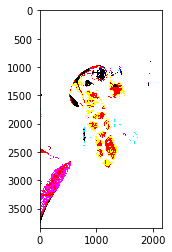

In [34]:
I =  io.imread('gigi.jpg').astype(np.float32)
I = I - 50
plt.imshow(I)
plt.show()

### Q2.1

What is incorrect with this approach? How can it be fixed while maintaining the same intended brightness reduction? Please include your code and result image.



In [36]:
np.min(I)

-50.0

This approach is incorrect. A value of 50 is subtracted from each pixel which results in some pixels being given negative values. This will throw errors when displaying the image. A fix to the problem would be to assign all pixels with negative values with an arbitrary number, such as 0. In addition, the pixel values are doubles, which means they should be between 0 and 1. Casting to integers will fix this.

In [43]:
I[I < 0] = 0
I = I.astype(int)

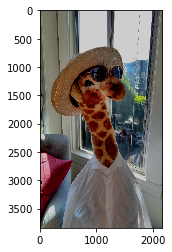

In [44]:
plt.imshow(I)
plt.show()